https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
# K-Means Clustering in OpenCV
## Goal
Learn to use cv2.kmeans() function in OpenCV for data clustering
### Understanding Parameters
#### Input parameters
1.samples : It should be of np.float32 data type, and each feature should be put in a single column.

2.nclusters(K) : Number of clusters required at end

3.criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are ( type, max_iter, epsilon ):
    3.a - type of termination criteria : It has 3 flags as below:
cv2.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached. cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter. cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
    3.b - max_iter - An integer specifying maximum number of iterations.
    3.c - epsilon - Required accuracy
4.attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5.flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS.

# Output parameters
1.compactness : It is the sum of squared distance from each point to their corresponding centers.

2.labels : This is the label array (same as ‘code’ in previous article) where each element marked ‘0’, ‘1’.....

3.centers : This is array of centers of clusters.

### Load Image

In [1]:
!wget https://img.freepik.com/free-photo/soft-wave-sea-empty-sandy-beach_9635-3044.jpg
!wget https://www.planetware.com/wpimages/2019/07/virginia-best-beaches-ocean-view-beach-norfolk.jpg
!wget https://specials-images.forbesimg.com/imageserve/5f37ed61185a0bb967ccc51c/960x0.jpg


--2021-10-18 15:39:40--  https://img.freepik.com/free-photo/soft-wave-sea-empty-sandy-beach_9635-3044.jpg
Resolving img.freepik.com (img.freepik.com)... 23.42.146.182
Connecting to img.freepik.com (img.freepik.com)|23.42.146.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55857 (55K) [image/jpeg]
Saving to: 'soft-wave-sea-empty-sandy-beach_9635-3044.jpg'

     0K .......... .......... .......... .......... .......... 91%  186K 0s
    50K ....                                                  100% 86.7G=0.3s

2021-10-18 15:39:41 (203 KB/s) - 'soft-wave-sea-empty-sandy-beach_9635-3044.jpg' saved [55857/55857]

--2021-10-18 15:39:41--  https://www.planetware.com/wpimages/2019/07/virginia-best-beaches-ocean-view-beach-norfolk.jpg
Resolving www.planetware.com (www.planetware.com)... 65.9.182.99, 65.9.182.58, 65.9.182.59, ...
Connecting to www.planetware.com (www.planetware.com)|65.9.182.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

#### rename download image 

In [3]:
!ren soft-wave-sea-empty-sandy-beach_9635-3044.jpg coast01.jpg
!ren virginia-best-beaches-ocean-view-beach-norfolk.jpg coast02.jpg
!ren 960x0.jpg coast03.jpg

### Import Libs

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Run K-Mean

In [2]:
img = cv.imread('coast01.jpg')
imgOriginal = img.copy()
imgOriginal = cv.cvtColor(imgOriginal,cv.COLOR_BGR2RGB)

In [3]:
img.shape

(1920, 2560, 3)

In [4]:
Z = img.reshape((-1,3))
Z.shape

(4915200, 3)

In [5]:
# convert to np.float32
print(Z.dtype)
Z = np.float32(Z)
print(Z.dtype)

uint8
float32


In [6]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
LastK = 8

In [7]:
res2Arr = [] # เก็บภาพผลลัพธ์
for i in range(K,LastK+1):
  ret,label,center=cv.kmeans(Z,i,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2Arr.append(res.reshape((img.shape)))

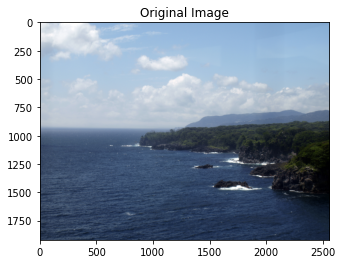

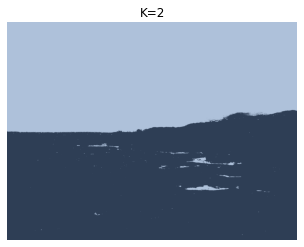

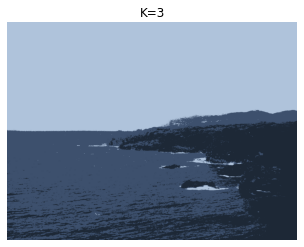

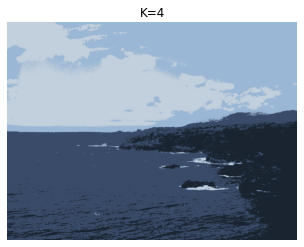

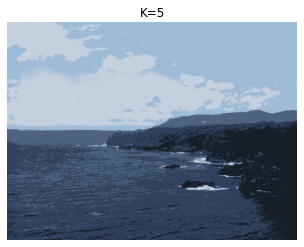

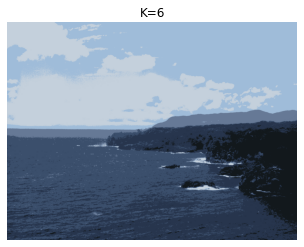

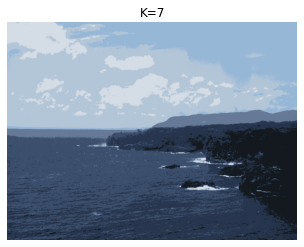

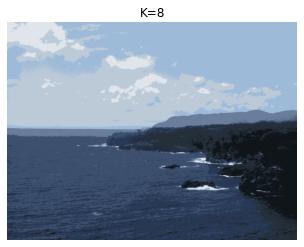

In [8]:
# plot original
plt.imshow(imgOriginal)
plt.title("Original Image")
plt.show()
# plot image in each k
for i in range(K,LastK+1):
  tempRGB = cv.cvtColor(res2Arr[i-K],cv.COLOR_BGR2RGB)
  plt.imshow(tempRGB)
  plt.title("K="+str(i))
  plt.xticks([]),plt.yticks([])
  plt.axis('off')
  plt.show()

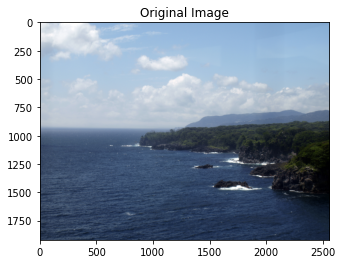

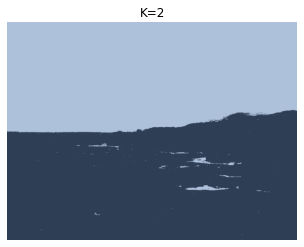

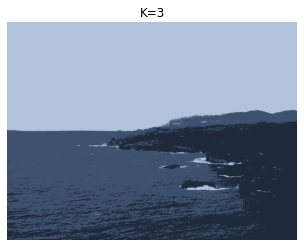

In [16]:
img = cv.imread('coast01.jpg')
imgOriginal = img.copy()
imgOriginal = cv.cvtColor(imgOriginal,cv.COLOR_BGR2RGB)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
LastK = 3
res2Arr = []
for i in range(K,LastK+1):
  ret,label,center=cv.kmeans(Z,i,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2Arr.append(res.reshape((img.shape)))
# plot original
plt.imshow(imgOriginal)
plt.title("Original Image")
plt.show()
# plot image in each k
for i in range(K,LastK+1):
  tempRGB = cv.cvtColor(res2Arr[i-K],cv.COLOR_BGR2RGB)
  plt.imshow(tempRGB)
  plt.title("K="+str(i))
  plt.xticks([]),plt.yticks([])
  plt.axis('off')
  plt.show()

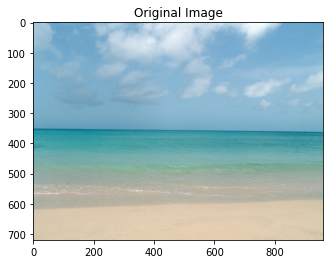

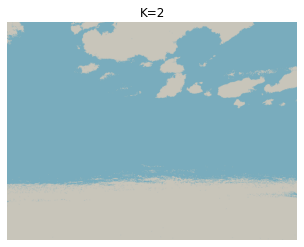

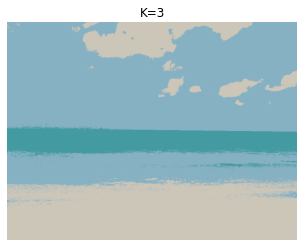

In [13]:
img = cv.imread('coast03.jpg')
imgOriginal = img.copy()
imgOriginal = cv.cvtColor(imgOriginal,cv.COLOR_BGR2RGB)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
LastK = 3
res2Arr = []
for i in range(K,LastK+1):
  ret,label,center=cv.kmeans(Z,i,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2Arr.append(res.reshape((img.shape)))
# plot original
plt.imshow(imgOriginal)
plt.title("Original Image")
plt.show()
# plot image in each k
for i in range(K,LastK+1):
  tempRGB = cv.cvtColor(res2Arr[i-K],cv.COLOR_BGR2RGB)
  plt.imshow(tempRGB)
  plt.title("K="+str(i))
  plt.xticks([]),plt.yticks([])
  plt.axis('off')
  plt.show()

In [14]:
img = cv.imread('coast03.jpg')
imgOriginal = img.copy()
imgOriginal = cv.cvtColor(imgOriginal,cv.COLOR_BGR2RGB)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
res2Arr = []
ret,label,center=cv.kmeans(Z,5,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
print(center)

[[176 202 220]
 [162 154  68]
 [160 174 162]
 [201 177 129]
 [226 208 184]]


In [58]:
center[0] = [195, 169, 152]
center[1] = [195, 169, 152]
center[2] = [195, 169, 152]
print(center)

[[195 169 152]
 [195 169 152]
 [195 169 152]
 [183 211 234]
 [ 89  84  69]]


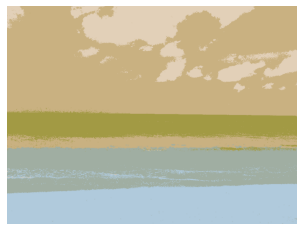

In [15]:
resultImage = center[label.flatten()]
resultImage = resultImage.reshape(img.shape)
plt.imshow(resultImage)
plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()